In [1]:
import pickle
import os
import matplotlib.pyplot as plt


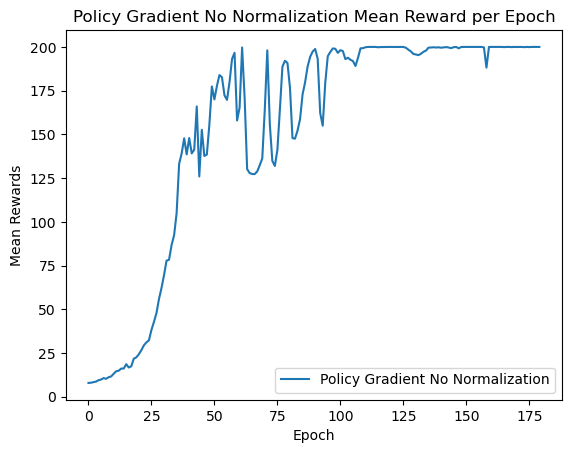

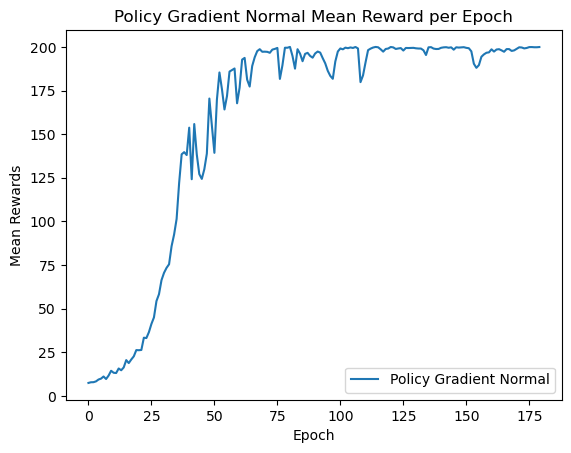

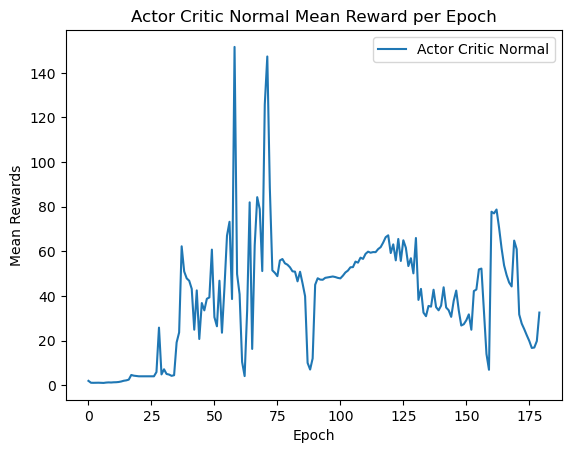

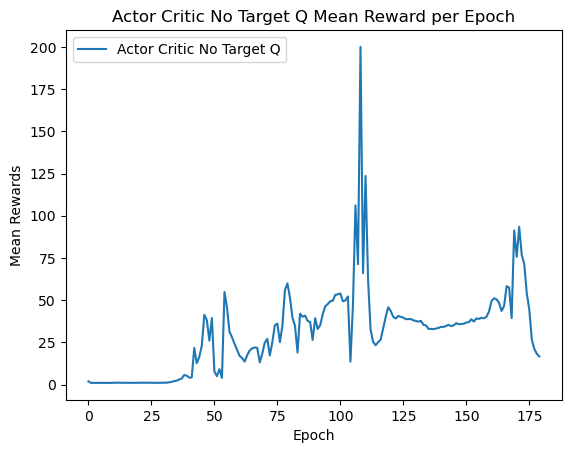

In [11]:
# Load pickles
files = os.listdir('pickle')
#files = [os.path.join('pickle',file) for file in files if file.startswith('ac')]
files = [os.path.join('pickle',file) for file in files]
losses = list()
for file in files:
    file_helper = file.split('.')[0].split('_')
    file_helper[0] = file_helper[0].split('/')[1]
    split = file_helper[-1]
    policy = file_helper[0]
    with open(file, 'rb') as f:
        losses.append((pickle.load(f), split, policy))  

# Make plot
for reward, split, policy in losses:
    title = "Actor Critic" if policy == 'ac' else "Policy Gradient"
    label = ""
    if split == "nonorm":
        label = "No Normalization"
    elif split == "notarget":
        label = "No Target Q"
    else:
        label = "Normal"
    plt.plot(reward, label=f"{title} {label}")
    plt.title(f"{title} {label} Mean Reward per Epoch")
    plt.xlabel("Epoch")
    plt.ylabel("Mean Rewards")
    plt.legend()
    plt.savefig(f"figs/{policy}_{split}.pdf")
    plt.show()
    plt.close()
